In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

import seaborn as sns


def runge_kutta(time_steps, y0, system, params):
    ys = [y0]
    for t in range(len(time_steps)-1):
        dt = time_steps[t+1]-time_steps[t]
        t0 = time_steps[t]
        t1 = time_steps[t+1]
        k1 = system(t0, y0, params)
        k2 = system(t0 + dt/2, y0 + dt / 2 * k1, params)
        k3 = system(t0 + dt/2, y0 + dt / 2 * k2, params)
        k4 = system(t1, y0 + dt * k3, params)
        y0  = y0 + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        ys.append(y0)
    return np.array(ys)

def lorentz_ode(t, xyz, params):
    x, y, z = xyz
    σ = params['σ']
    ρ = params['ρ']
    β = params['β']
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return np.array([dx, dy, dz])

time_steps = np.arange(0, 1500, 0.1)
params = {'σ' : 10., 'ρ' : 28., 'β' : 8/3}
xyz0 = np.array([1., 1., 1.])
lorenz_solution = runge_kutta(time_steps, xyz0, lorentz_ode, params)
x, y, z = lorenz_solution[2000:].T

In [3]:
x = (x - min(x)) / (max(x) - min(x))

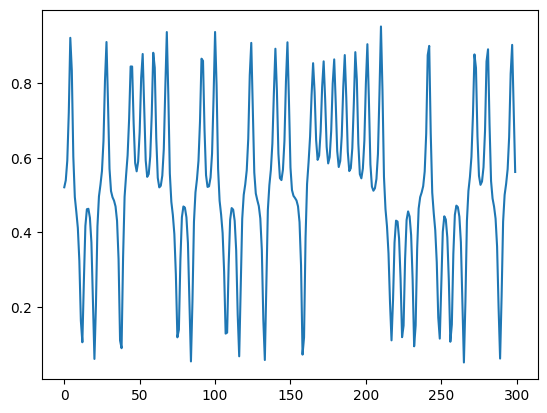

In [4]:
plt.plot(x[:300])

In [5]:
import itertools

def generate_patterns(K, L):
    patterns = np.array(list(itertools.product(np.arange(1, K+1), repeat=L)))
    return patterns

def sample_z_vectors(x, pattern):
    T = len(x)
    ind = np.array([0, *np.cumsum(pattern)])

    samples = []
    for i in range(T-ind[-1]):
        samples.append(x[ind+i][:])
    return np.array(samples)

def sample_z_new(x, pattern):
    ind = np.array([0, *np.cumsum(pattern)])
    T = len(x) - ind[-1]
    return x[ind[:-1] + T]

In [6]:
patterns = generate_patterns(K=10, L=4)
patterns

array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  2],
       [ 1,  1,  1,  3],
       ...,
       [10, 10, 10,  8],
       [10, 10, 10,  9],
       [10, 10, 10, 10]], shape=(10000, 4))

In [7]:
x_train = x[:3000]
x_test = x[3000:]
Zs = []
for pattern in tqdm.tqdm(patterns):
    Zs.append(sample_z_vectors(x_train, pattern))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:31<00:00, 317.34it/s]


In [8]:
patterns[13], Zs[13]

(array([1, 1, 2, 4]),
 array([[0.52126788, 0.53986791, 0.59267744, 0.92249179, 0.45510371],
        [0.53986791, 0.59267744, 0.72221493, 0.83491468, 0.41192669],
        [0.59267744, 0.72221493, 0.92249179, 0.60333675, 0.32351637],
        ...,
        [0.16932163, 0.10209493, 0.26142038, 0.46100455, 0.22060862],
        [0.10209493, 0.26142038, 0.41358617, 0.46278679, 0.06159885],
        [0.26142038, 0.41358617, 0.46100455, 0.43867186, 0.20505306]],
       shape=(2992, 5)))

In [9]:
predictions = []
for h in range(20):
    S = []
    for i, pattern in tqdm.tqdm(enumerate(patterns)):
        z_new = sample_z_new(x_train, pattern)
        S.extend(Zs[i][np.linalg.norm(Zs[i][:, :-1] - z_new, axis=1) < 0.005][:, -1])
    y_hat = np.mean(S)
    x_train = np.append(x_train, y_hat)
    predictions.append(y_hat)

10000it [00:00, 17879.78it/s]
10000it [00:00, 17909.15it/s]
10000it [00:00, 17854.61it/s]
10000it [00:00, 17853.37it/s]
10000it [00:00, 17846.92it/s]
10000it [00:00, 17934.08it/s]
10000it [00:00, 17746.67it/s]
10000it [00:00, 17677.96it/s]
10000it [00:00, 17660.50it/s]
10000it [00:00, 17651.66it/s]
10000it [00:00, 17515.08it/s]
10000it [00:00, 17646.63it/s]
10000it [00:00, 17552.59it/s]
10000it [00:00, 17639.80it/s]
10000it [00:00, 17508.58it/s]
10000it [00:00, 17709.87it/s]
10000it [00:00, 17643.50it/s]
10000it [00:00, 17740.30it/s]
10000it [00:00, 17765.20it/s]
10000it [00:00, 17850.38it/s]


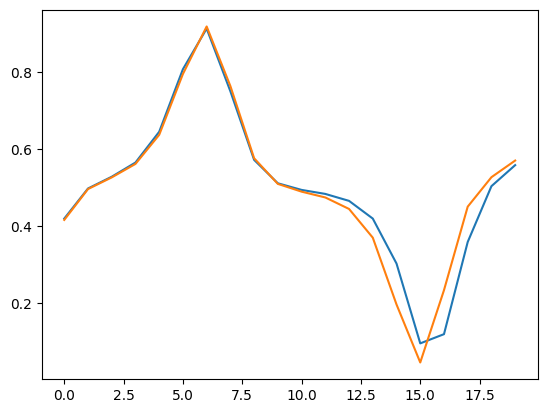

In [10]:
plt.plot(predictions)
plt.plot(x_test[:20])

# plt.plot(x[:20])

In [11]:
x_test[0]

np.float64(0.4150660421209667)

In [12]:
predictions_step1 = []

for h in range(20):
    S = []
    for i, pattern in tqdm.tqdm(enumerate(patterns)):
        z_new = sample_z_new(x_train, pattern)
        S.extend(Zs[i][np.linalg.norm(Zs[i][:, :-1] - z_new, axis=1) < 0.005][:, -1])
    y_hat = np.mean(S)
    x_train = np.append(x_train, x_test[h])
    predictions_step1.append(y_hat)

10000it [00:00, 17689.98it/s]
10000it [00:00, 17822.85it/s]
10000it [00:00, 17881.51it/s]
10000it [00:00, 17819.54it/s]
10000it [00:00, 17935.11it/s]
10000it [00:00, 17871.94it/s]
10000it [00:00, 17943.33it/s]
10000it [00:00, 18068.05it/s]
10000it [00:00, 17892.90it/s]
10000it [00:00, 17907.02it/s]
10000it [00:00, 17702.25it/s]
10000it [00:00, 18037.04it/s]
10000it [00:00, 17967.05it/s]
10000it [00:00, 17823.67it/s]
10000it [00:00, 17966.07it/s]
10000it [00:00, 17928.56it/s]
10000it [00:00, 17991.75it/s]
10000it [00:00, 17898.44it/s]
10000it [00:00, 17942.99it/s]
10000it [00:00, 17992.19it/s]


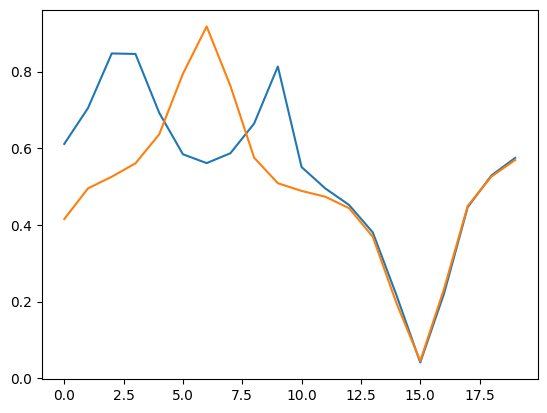

In [13]:
plt.plot(predictions_step1)
plt.plot(x_test[:20])

In [14]:
#Нормирование
max_point = max(predictions)
print(max_point)
min_point = min(predictions)
print(min_point)

0.9121348378702665
0.09434897788824041


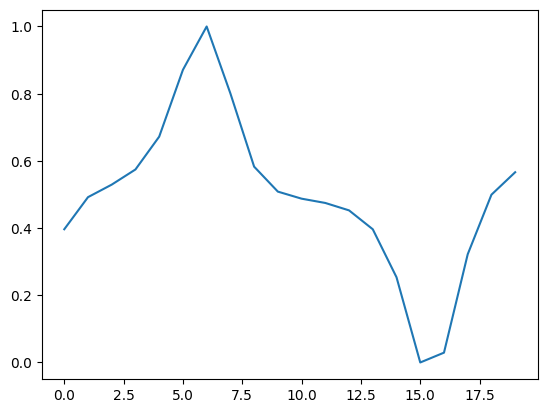

In [15]:
norm_predictions = []
for i, prediction in enumerate(predictions):
    norm_predictions.append((prediction - min_point) / (max_point - min_point))
plt.plot(norm_predictions)


In [17]:
from scipy.signal import argrelmax, argrelmin

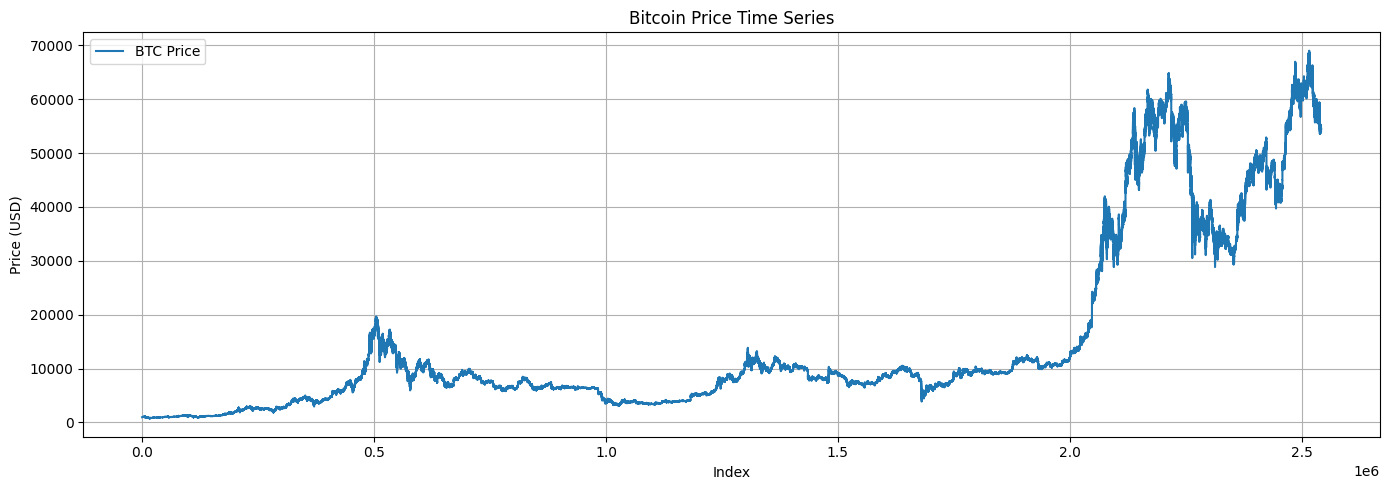

In [19]:
import pandas as pd
btc_df = pd.read_csv('BTC.csv')

btc_series = pd.Series(btc_df['price'].values, name="BTC Price")

plt.figure(figsize=(14, 5))
plt.plot(btc_series, label='BTC Price')
plt.title("Bitcoin Price Time Series")
plt.xlabel("Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


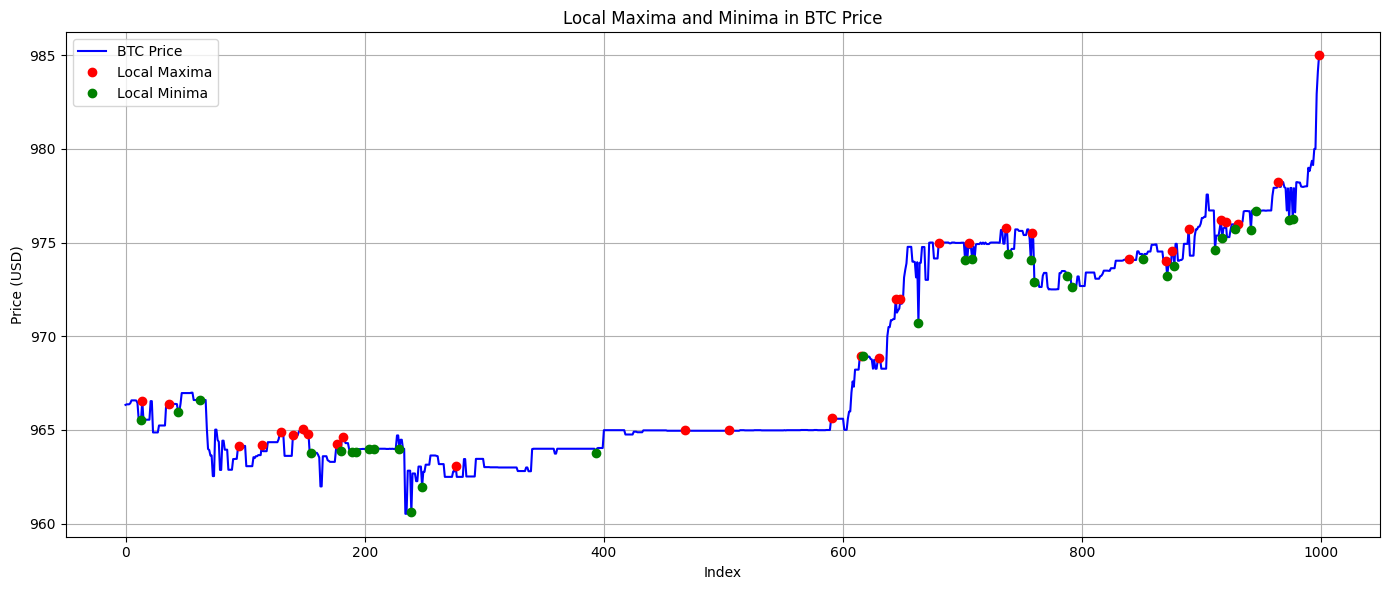

In [21]:
# Находим индексы локальных максимумов и минимумов
local_max_idx = argrelmax(btc_series[:1000].values, order=2)[0]
local_min_idx = argrelmin(btc_series[:1000].values, order=2)[0]

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(btc_series[:1000], label='BTC Price', color='blue')
plt.plot(local_max_idx, btc_series[:1000].iloc[local_max_idx], 'ro', label='Local Maxima')
plt.plot(local_min_idx, btc_series[:1000].iloc[local_min_idx], 'go', label='Local Minima')
plt.title("Local Maxima and Minima in BTC Price")
plt.xlabel("Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
print(len(local_max_idx), len(local_min_idx))
print(*local_max_idx)
print(*local_min_idx)

31 32
14 36 95 114 130 140 148 153 177 182 276 468 505 591 615 630 644 648 680 705 736 758 839 870 875 889 916 920 930 964 998
13 44 62 155 180 189 193 204 208 229 239 248 393 617 663 702 708 738 757 760 787 791 851 871 877 911 917 928 941 945 973 976


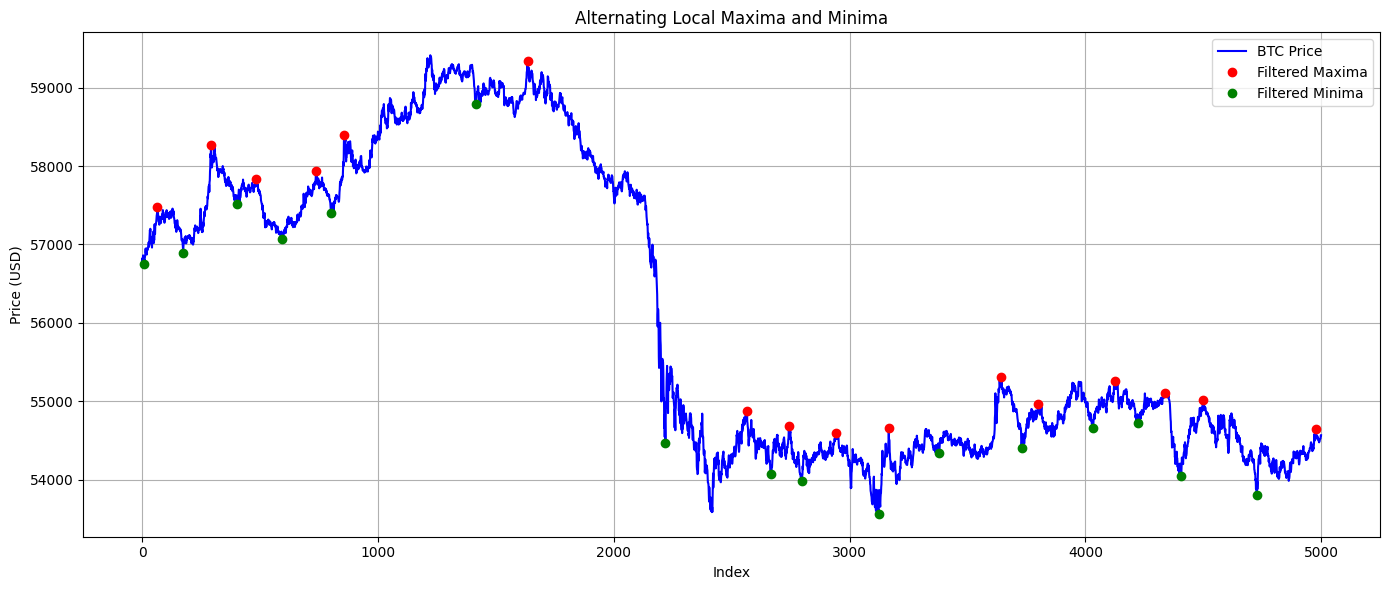

In [24]:
# Находим локальные максимумы и минимумы
max_idx = argrelmax(btc_series.values[-5000:], order=100)[0]
min_idx = argrelmin(btc_series.values[-5000:], order=100)[0]

# Объединяем и сортируем по позиции во времени
extrema = np.sort(np.concatenate((max_idx, min_idx)))

# Фильтруем, чтобы чередовались: min-max-min... или max-min-max...
filtered_extrema = [extrema[0]]
for idx in extrema[1:]:
    last = filtered_extrema[-1]
    if (last in max_idx and idx in min_idx) or (last in min_idx and idx in max_idx):
        filtered_extrema.append(idx)

# Разделим обратно на максимумы и минимумы
filtered_max = [i for i in filtered_extrema if i in max_idx]
filtered_min = [i for i in filtered_extrema if i in min_idx]

# Построим график
plt.figure(figsize=(14, 6))
plt.plot(btc_series.values[-5000:], label='BTC Price', color='blue')
plt.plot(filtered_max, btc_series.values[-5000:][filtered_max], 'ro', label='Filtered Maxima')
plt.plot(filtered_min, btc_series.values[-5000:][filtered_min], 'go', label='Filtered Minima')
plt.title("Alternating Local Maxima and Minima")
plt.xlabel("Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
print(len(local_max_idx), len(local_min_idx))
print(*local_max_idx)
print(*local_min_idx)

31 32
14 36 95 114 130 140 148 153 177 182 276 468 505 591 615 630 644 648 680 705 736 758 839 870 875 889 916 920 930 964 998
13 44 62 155 180 189 193 204 208 229 239 248 393 617 663 702 708 738 757 760 787 791 851 871 877 911 917 928 941 945 973 976


In [26]:
взять на основе 10к точек спрогнозировать еще 5к

SyntaxError: invalid syntax (3047082100.py, line 1)

In [ ]:
# predictions = []
# for h in range(20):
#     S = []
#     for i, pattern in tqdm.tqdm(enumerate(patterns)):
#         z_new = sample_z_new(x_train, pattern)
#         S.extend(Zs[i][np.linalg.norm(Zs[i][:, :-1] - z_new, axis=1) < 0.005][:, -1])
#     y_hat = np.mean(S)
#     x_train = np.append(x_train, y_hat)
#     predictions.append(y_hat)import pandas as pd

# === Загрузка данных ===
df = pd.read_csv("BTC.csv")
x = df['price'].values

# === Нормализация ===
x = (x - x.min()) / (x.max() - x.min())

# === Выбор обучающей части ===
x_train = x[:10_000].copy()
x_test = x[10_000:15_000]  # для сравнения

# === Генерация паттернов ===
def generate_patterns(K, L):
    return np.array(list(itertools.product(np.arange(1, K+1), repeat=L)))

def sample_z_vectors(x, pattern):
    T = len(x)
    ind = np.array([0, *np.cumsum(pattern)])
    samples = []
    for i in range(T - ind[-1]):
        samples.append(x[ind + i])
    return np.array(samples)

def sample_z_new(x, pattern):
    ind = np.array([0, *np.cumsum(pattern)])
    T = len(x) - ind[-1]
    return x[ind[:-1] + T]

patterns = generate_patterns(K=10, L=4)

# === Обучающие вектора Zs ===
Zs = [sample_z_vectors(x_train, pattern) for pattern in tqdm.tqdm(patterns)]

# === Прогнозирование ===
predictions = []

for h in tqdm.tqdm(range(5000)):
    S = []
    for i, pattern in enumerate(patterns):
        z_new = sample_z_new(x_train, pattern)
        distances = np.linalg.norm(Zs[i][:, :-1] - z_new, axis=1)
        matches = Zs[i][distances < 0.005]
        S.extend(matches[:, -1])
    
    y_hat = np.mean(S) if S else x_train[-1]  # если нет совпадений, используем последнее значение
    x_train = np.append(x_train, y_hat)
    predictions.append(y_hat)

# === Визуализация прогноза ===
plt.figure(figsize=(12, 5))
plt.plot(range(10_000, 15_000), predictions, label='Прогноз')
plt.plot(range(10_000, 15_000), x[10_000:15_000], label='Настоящие значения')
plt.title("Прогноз ряда BTC (нормализованный)")
plt.legend()
plt.grid(True)
plt.show()


  0%|                                                                              | 2/5000 [00:17<12:05:03,  8.70s/it]

In [ ]:
для каждой точки из 5к посчитать std and iqr и сохранить в список

In [ ]:
отделить список для экстремумов и для не экстремумов